In [1]:
import os
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import stats

GENERADOR 

In [2]:
def generator(rangeR,range_w,range_r,ns,k,path):
    for i in ns:
        for j in range(k):
            R = np.random.randint(rangeR[0],rangeR[1])
            w = np.random.randint(range_w[0],range_w[1], i)
            r = np.random.randint(range_r[0], range_r[1], i) 
            
            f = open((path + "{}--{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            
            for l in range(i-1):
                f.write("{} {}\n".format(w[l], r[l]))
            
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

INSTANCIAS: TODOS, MUCHOS, POCOS Y NINGUNO

In [3]:
rangeR = (1000, 1500)                        
range_w =  (10,20)
range_r = (1000, 1500)
ns =  np.arange(1, 30)
k = 15
path = "../Instancias/Todos/"

generator(rangeR,range_w,range_r,ns,k,path)

In [4]:
range_w =  (60,80)
range_r = (600, 800)
path = "../Instancias/Muchos/"

generator(rangeR,range_w,range_r,ns,k,path)

In [5]:
range_w =  (300,500)
range_r = (600, 700)
path = "../Instancias/Pocos/"

generator(rangeR,range_w,range_r,ns,k,path)

In [6]:
range_w =  (2000,2500)
path = "../Instancias/Ninguno/"

generator(rangeR,range_w,range_r,ns,k,path)

EXPERIMENTACION FB

In [7]:
def experimentFB(ns,k,path):
    
    times_n = []

    for i in ns:
        timeAcc = 0
        
        for j in range(k):
            start = time.time()
            os.system(("./../ejec ./../" + path + "{}--{}.in FB").format(i, j))
            timeAcc += time.time() - start
            
        times_n.append(timeAcc/k)
    
    return times_n

EJECUCION FB

In [8]:
os.system("g++ ../src/main.cpp -o ../ejec")
todosFB = experimentFB(ns,k,"Instancias/Todos/")
ningunoFB = experimentFB(ns,k,"Instancias/Ninguno/") 

GRAFICOS FB

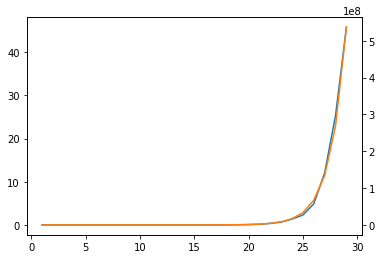

In [9]:
def exponential(ns):
    res = []
    for i in ns:
        res.append(2**i)
    return res
        
nsExponential = exponential(ns)

plt.plot(ns,todosFB)
ax = plt.twinx()               #USO MISMO EJE X PERO NO MISMO EJE Y
ax.plot(ns,nsExponential,color='tab:orange')
plt.savefig('ExpFB2.png')


plt.show()

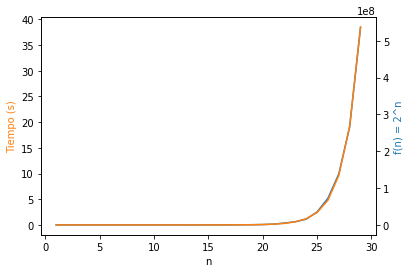

In [10]:
plt.plot(ns,ningunoFB)
plt.xlabel('n')
plt.ylabel('Tiempo (s)',color='tab:orange')

ax = plt.twinx()  
ax.set_ylabel('f(n) = 2^n',color = "tab:blue")
ax.plot(ns,nsExponential,color='tab:orange')
plt.savefig('foo.png')
plt.show()


EXPERIMENTACION BT

In [11]:
def experimentBT(ns,k,path):
    
    times_nBT = []
    times_nBTF = []
    times_nBTO = []

    for i in ns:
        timeAccBT = 0
        timeAccBTF = 0
        timeAccBTO = 0
        
        
        for j in range(k):
            
            start = time.time()
            os.system(("./../ejec ./../" + path + "{}--{}.in BT").format(i, j))
            timeAccBT += time.time() - start
            
            start = time.time()
            os.system(("./../ejec ./../" + path + "{}--{}.in BTF").format(i, j))
            timeAccBTF += time.time() - start
            
            start = time.time()
            os.system(("./../ejec ./../" + path + "{}--{}.in BTO").format(i, j))
            timeAccBTO += time.time() - start
        
        times_nBT.append(timeAccBT/k)
        times_nBTF.append(timeAccBTF/k)
        times_nBTO.append(timeAccBTO/k)
    
    return [times_nBT,times_nBTF,times_nBTO]

EJECUCION BT

In [12]:
os.system("g++ ../src/main.cpp -o ../ejec")
todosBT = experimentBT(ns,k,"Instancias/Todos/")
muchosBT = experimentBT(ns,k,"Instancias/Muchos/")
pocosBT = experimentBT(ns,k,"Instancias/Pocos/")
ningunoBT = experimentBT(ns,k,"Instancias/Ninguno/") 

GRAFICOS BT

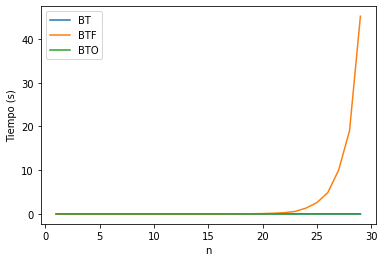

In [13]:
plt.plot(ns,todosBT[0],label = "BT")
plt.plot(ns,todosBT[1], label = "BTF")
plt.plot(ns,todosBT[2], label = "BTO")

plt.xlabel("n")
plt.ylabel("Tiempo (s)")

plt.legend()
plt.show()

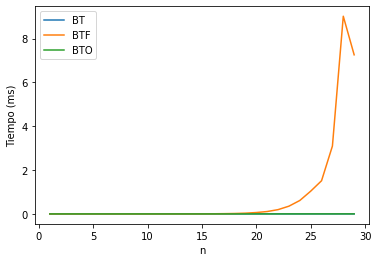

In [14]:
plt.plot(ns,muchosBT[0],label = "BT")
plt.plot(ns,muchosBT[1], label = "BTF")
plt.plot(ns,muchosBT[2], label = "BTO")

plt.xlabel("n")
plt.ylabel("Tiempo (ms)")

plt.legend()
plt.show()

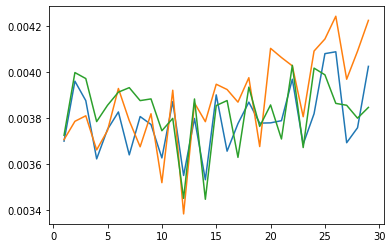

In [15]:
plt.plot(ns,pocosBT[0])
plt.plot(ns,pocosBT[1])
plt.plot(ns,pocosBT[2])

plt.show()

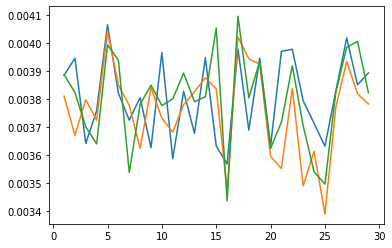

In [16]:
#############ACA HAY ALGO QUE NO CIERRA, BTO DEBERIA TARDAR MAS###############
plt.plot(ns,ningunoBT[0])
plt.plot(ns,ningunoBT[1])
plt.plot(ns,ningunoBT[2])
plt.show()